# Исследование объявлений о продаже квартир

## Описание проекта
В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В это проекта учим определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Оглавление
- [Шаг 1. Первичная работа с файлом.](#step1)
- [Шаг 2. Предобработка данных.](#step2)
- [Шаг 3. Добавление таблицы.](#step3)
- [Шаг 4. Исследовательский анализ данных.](#step4)
- [Шаг 5. Изучим время продажи квартиры.](#step5)
    - [Какие факторы больше всего влияют на стоимость квартиры.](#step6)
    - [10 населённых пунктов с наибольшим числом объявлений.](#step7)
    - [Расстояние до центра.](#step8)
    - [Выделение сегмента квартир в центре.](#step9)
- [Шаг 6. Общий вывод.](#step10)

# Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Шаг 1. Первичная работа с файлом. <a id=step1></a>

In [2]:
advert = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
advert.info()
advert.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Много пропущенных значений в 14 столбцах. 

- Пустые значения в столбце высота потолков могут означать, что хозяева квартиры не посчитали нужным заполнять это поле либо же он просто не знаю точную высоту. 
- NaN в этажности дома, также как в жилой площади и площади кухни могли появиться из-за нежелания хозяина квартиры заполнять эти данные.
- Самое большое количество пустых значений в столбце апартаменты (булев тип) (всего 11,7% процент заполняемости). В самом сервисе Яндекс.Недвижимость нигде не нашл отдельного поля продаются апартаменты или нет. Этот пункт максимально незаметен на сайте или его нет совсем, поэтому пользователи либо пропускают его, либо значения этого столбца могли быть взяты из описания путем лемматизации. Так как тип квартиры нигде не будет фигурировать в исследовании и продавцы только в некоторых случаях добавляют, что у них апартаменты (или наоборот), то мы заполним пропуски значением False, ведь в большинстве случаев продаются НЕ апартаменты.
- Также имеем пропуски в населенных пунктах, которые могли появиться из-за ошибок при выгрузке, так как их всего 49 штук (не так уж и много).
- В остальных столбцах, которые были заполнены автоматически на основе картографических данных, пропуски могли появиться изза того, что не было достаточной информации обо всех объектах.

1. Интересный момент, что есть квартиры с 0 (предположительно студии) и 19 комнатами (преположительно коммунальные квартиры, которые продаются целиком).
2. Высота потолков в каких-то квартирах 1м, а максимальная 100м, хотя последнее может быть каким-нибудь складским помещением, однако все равно очень большая высота, да и мы говорим в иссследовании именно об объявлениях продажи квартир.
3. В названиях поселков есть повторяющиеся, но где-то написано "поселок", где-то "посёлок" либо просто название. 

### Шаг 2. Предобработка данных. <a id=step2></a>

In [3]:
# Уберем лишние пробелы в столбце с названием населенного пункта

advert['locality_name'] = advert['locality_name'].str.strip()

Заполним пропуски в столбце общей площади. Для этого создадим таблицу медианных значений общей площади по каждому типу квартир в зависимости от количества комнат и далее подставим эти значения в общую таблицу.

In [4]:
median_table_total_area = advert.groupby('rooms').agg({'total_area':'median'})

for room in median_table_total_area.index:
    advert.loc[advert['rooms'] == room, 'total_area'] = advert.loc[
        advert['rooms'] == room, 'total_area'].fillna(median_table_total_area.loc[room, 'total_area'])

len(advert[advert['total_area'].isnull()])

0

В столбце с количеством балконов есть пропущенные значения, которые можно заменить на 0, так как скорее всего люди просто не отмечали ничего в этом разделе, если у них нет балкона, отсюда и столько пропусков.

In [5]:
advert['balcony'] = advert['balcony'].fillna(0)
len(advert[advert['balcony'].isnull()])

0

У нас 49 строк без названия населенного пункта, составляет 0,2%. На данный момент непонятно, откуда можно было бы подтянуть эти данные или предположить на каком-то основании, что это то или иное место, попробуем удалить эти строи методом dropna() и посмотрим, что из этого выйдет.

In [6]:
advert.dropna(subset=['locality_name'], inplace=True)
len(advert[advert['locality_name'].isnull()])

0

Заменяем пропуски в столбце is_apartment значением False, так как ранее я уже описывала, что отедльного поля ввода для параметра "Апартаменты" в поиске нет, скорее значения столбца были взяты из описания, поэтому логично предположить, что если в описании не написано, что это апартаменты, то это будет обычная квартира со всеми стандартными правами на нее.

In [7]:
advert['is_apartment'] = advert['is_apartment'].fillna(False)
len(advert[advert['is_apartment'].isnull()])

0

Заполним пропуски в столбце всего этажей в доме.

Чтоыб не было ситуации, когда этаж квартиры больше, чем этажность дома, применяем два условия для замены пропусков - когда медиана меньше или равна этажу квартиры, то ставим вместо пропуска в 'floors_total' этаж квартиры, а если медиана больше этажа квартиры, то вместо пропуска медиана.

In [8]:
median_table = advert.groupby('locality_name').agg({'floors_total':'median'})
for local_name in median_table.index:
    advert.loc[(advert['locality_name'] == local_name) & (
        advert['floor'] <= median_table.loc[local_name, 'floors_total']), 'floors_total'] = advert.loc[(
        advert['locality_name'] == local_name) & (
        advert['floor'] <= median_table.loc[local_name, 'floors_total']), 'floors_total'].fillna(
        median_table.loc[local_name, 'floors_total'])
    
    advert.loc[(advert['locality_name'] == local_name) & (
        advert['floor'] > median_table.loc[local_name, 'floors_total']), 'floors_total'] = advert.loc[(
        advert['locality_name'] == local_name) & (
        advert['floor'] > median_table.loc[local_name, 'floors_total']), 'floors_total'].fillna(
    advert['floor'])

len(advert[advert['floors_total'].isnull()])


0

In [10]:
advert[advert['days_exposition'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,...,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,...,6.0,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,...,6.2,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,...,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,...,5.2,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Я хотела с помощью лемматизации убрать неполные дубликаты в названиях населенных пунктов.

Но, написав половину кода для всего этого, я поняла, что в этом особо смылса нет, так как первая десятка географических названий почти не имеет дубликатов, поэтому при помощи метода replace() заменила на "Мурино" остальные производные названия этого населенного пункта. Новый столбец с леммами мы закомментируем, так как уже сильно много столбцов и некоторые просто не выводятся на экран.

In [11]:
from pymystem3 import Mystem
# m = Mystem()
# advert['location_lemmas'] = advert['locality_name'].apply(m.lemmatize)
# advert.head(20)

from collections import Counter
# count_location_lemmas = Counter(advert['location_lemmas'].sum())
# count_location_lemmas.most_common()

# В перой десятке названий только одно поторяется в разных интерпретациях - Мурино,
# методом replace() заменю "поселок Мурино" и "посёлок Мурино" на просто "Мурино".

advert['locality_name'] = advert['locality_name'].str.replace('ё', 'е')
advert['locality_name'] = advert['locality_name'].replace('поселок Мурино', 'Мурино')
advert['locality_name'] = advert['locality_name'].replace('деревня Кудрово', 'Кудрово')

advert['locality_name'].sort_values().value_counts()

Санкт-Петербург                 15721
Мурино                            590
Кудрово                           472
поселок Шушары                    440
Всеволожск                        398
                                ...  
деревня Курковицы                   1
поселок станции Лужайка             1
деревня Тойворово                   1
городской поселок Свирьстрой        1
деревня Пижма                       1
Name: locality_name, Length: 328, dtype: int64

Переходим к заполнению пропусков в столбцах: высота потолков и жилая площадь. Для этого будет создан словарь, где будут медианные значения высоты и площади в зависимости от населенного пункта, а уже из словарика мы далее возьмем эти медианные значения и заполним ими пропуски в соответствующих слобцах.

In [13]:
median_table_ceiling = advert.groupby('locality_name').agg(
    {'ceiling_height':'median'})

for location in median_table_ceiling.index:
    advert.loc[advert['locality_name'] == location, 'ceiling_height'] = advert.loc[
        advert['locality_name'] == location, 'ceiling_height'].fillna(
        median_table_ceiling.loc[location, 'ceiling_height'])

advert['ceiling_height'] = advert['ceiling_height'].fillna(200)

In [14]:
median_table_living_area = advert.groupby('rooms').agg(
    {'living_area':'median'})

for room in median_table_living_area.index:
    
    advert.loc[(advert['rooms'] == room) & (
        advert['living_area'] <= median_table_living_area.loc[room, 'living_area']), 'living_area'] = advert.loc[(advert['rooms'] == room) & (
        advert['living_area'] <= median_table_living_area.loc[room, 'living_area']), 'living_area'].fillna(median_table_living_area.loc[room, 'living_area'])
    
    
    advert.loc[(advert['rooms'] == room) & (
        advert['living_area'] > median_table_living_area.loc[room, 'living_area']), 'living_area'] = advert.loc[(advert['rooms'] == room) & (
        advert['living_area'] > median_table_living_area.loc[room, 'living_area']), 'living_area'].fillna(advert['total_area'])
    
    
print(len(advert[advert['ceiling_height'].isnull()]))
print(len(advert[advert['living_area'].isnull()]))

0
1898


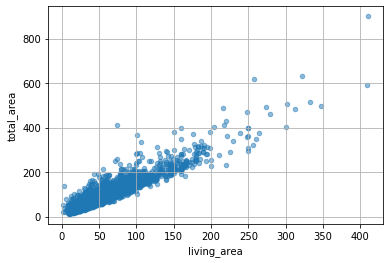

In [17]:
# advert.plot(y = 'total_area', x = 'living_area', alpha = 0.5, kind = 'scatter',  grid = True )

In [18]:
# Заполним пропуски в столбце расстояния до аэропорота.

mean_table_aeroports = advert.groupby('locality_name').agg({'airports_nearest':'mean'})

for location in mean_table_aeroports.index:
    advert.loc[advert['locality_name'] == location, 'airports_nearest'] = advert.loc[
        advert['locality_name'] == location, 'airports_nearest'].fillna(
        mean_table_aeroports.loc[location, 'airports_nearest'])

advert['airports_nearest'] = advert['airports_nearest'].fillna(100000)
len(advert[advert['airports_nearest'].isnull()])

0

In [19]:
# Заполним пропуски в столбце расстояния до центра.

mean_table_cityCentre = advert.groupby('locality_name').agg({'cityCenters_nearest':'mean'})

for locality in mean_table_cityCentre.index:
    advert.loc[advert['locality_name'] == locality, 'cityCenters_nearest'] = advert.loc[
        advert['locality_name'] == locality, 'cityCenters_nearest'].fillna(
        mean_table_cityCentre.loc[locality, 'cityCenters_nearest'])

advert['cityCenters_nearest'] = advert['cityCenters_nearest'].fillna(100000)
len(advert[advert['cityCenters_nearest'].isnull()])

0

In [20]:
# Заполним пропуски в столбце число парков в радиусе 3км.

mean_table_parksaround = advert.groupby('locality_name').agg({'parks_around3000':'mean'})

for locality in mean_table_parksaround.index:
    advert.loc[advert['locality_name'] == locality, 'parks_around3000'] = advert.loc[
        advert['locality_name'] == locality, 'parks_around3000'].fillna(
        mean_table_parksaround.loc[locality, 'parks_around3000'])


advert['parks_around3000'] = advert['parks_around3000'].fillna(100000)
len(advert[advert['parks_around3000'].isnull()])

0

In [21]:
# Заполним пропуски в столбце расстояния до ближайшего парка (м).

mean_table_parksnearest = advert.groupby('locality_name').agg({'parks_nearest':'mean'})

for locality in mean_table_parksnearest.index:
    advert.loc[advert['locality_name'] == locality, 'parks_nearest'] = advert.loc[
        advert['locality_name'] == locality, 'parks_nearest'].fillna(
        mean_table_parksnearest.loc[locality, 'parks_nearest'])

advert['parks_nearest'] = advert['parks_nearest'].fillna(100000)
len(advert[advert['parks_nearest'].isnull()])

0

In [22]:
# Заполним пропуски в столбце количество прудов в радиусе 3км.

mean_table_pondsaround = advert.groupby('locality_name').agg({'ponds_around3000':'mean'})

for locality in mean_table_pondsaround.index:
    advert.loc[advert['locality_name'] == locality, 'ponds_around3000'] = advert.loc[
        advert['locality_name'] == locality, 'ponds_around3000'].fillna(
        mean_table_pondsaround.loc[locality, 'ponds_around3000'])

advert['ponds_around3000'] = advert['ponds_around3000'].fillna(100000)
len(advert[advert['ponds_around3000'].isnull()])

0

In [23]:
# Заполним пропуски в столбце расстояния до ближайшего пруда (м).

mean_table_pondsnearest = advert.groupby('locality_name').agg({'ponds_nearest':'mean'})

for locality in mean_table_pondsnearest.index:
    advert.loc[advert['locality_name'] == locality, 'ponds_nearest'] = advert.loc[
        advert['locality_name'] == locality, 'ponds_nearest'].fillna(
        mean_table_pondsnearest.loc[locality, 'ponds_nearest'])

advert['ponds_nearest'] = advert['ponds_nearest'].fillna(100000)
len(advert[advert['ponds_nearest'].isnull()])

0

Для заполнения пропусков в столбце дней размещения объявления составим сводную таблицу, где в качестве строк будут названия населенных пунктов и количество комнат в квартирах, а в качестве столбца будет среднее значение дней размещения объявления по таким квартирам. Далее составляем цикл, который будет подставлять эти средние значения из сводной таблицы вместо пустых значений в соответствии с нас. пунктом и кол-вом комнат.

In [24]:
pivot_locality_exposition = advert.pivot_table(
    index=['locality_name', 'rooms'], values='days_exposition', aggfunc=['mean'])
pivot_locality_exposition.columns = ['mean']
pivot_locality_exposition

mean
locality_name        rooms            
Бокситогорск         1       32.000000
                     2       76.750000
                     3      159.000000
                     4      226.000000
Волосово             1      302.818182
...                                ...
село Русско-Высоцкое 1      300.666667
                     2      275.000000
                     3      504.000000
село Старая Ладога   2       45.000000
село Шум             3        9.000000

[709 rows x 1 columns]

In [25]:
for (locality_name, rooms) in pivot_locality_exposition.index:
    advert.loc[(advert['locality_name'] == locality_name) & (
    advert['rooms'] == rooms), 'days_exposition'] = advert.loc[
    (advert['locality_name'] == locality_name) & (
    advert['rooms'] == rooms), 'days_exposition'].fillna(
        pivot_locality_exposition.loc[(locality_name, rooms), 'mean'])
    
advert['days_exposition'] = advert['days_exposition'].fillna(10000)
    
advert.head(10)
advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around300

Однако после цикла все еще остались пустые значения, так как некоторые населенные пункты повторяются 1-4 раза и ни в одной из этих строк нет никаких даных в столбце days_exposition, поэтому остальные пустые значения я заменю явно выбивающимя маркером с большим значением.

In [26]:
kitchen_coeff = (advert['kitchen_area']/advert['total_area']).groupby(advert['rooms']).mean()

advert.loc[advert['kitchen_area'].isnull(), 'kitchen_area'] = advert.loc[
    advert['kitchen_area'].isnull(), 'rooms'].apply(lambda x: x * kitchen_coeff[x])

dataka = advert[advert['kitchen_area'].isnull()]
dataka['locality_name'].value_counts()

Санкт-Петербург                            110
Мурино                                      28
Кудрово                                     21
Никольское                                   6
Всеволожск                                   6
поселок Шушары                               4
поселок Парголово                            4
поселок Бугры                                3
Сертолово                                    3
городской поселок Новоселье                  2
Тосно                                        1
городской поселок Большая Ижора              1
деревня Новое Девяткино                      1
поселок Новый Свет                           1
поселок станции Корнево                      1
городской поселок Янино-1                    1
поселок городского типа имени Свердлова      1
поселок городского типа Дубровка             1
поселок Петро-Славянка                       1
Отрадное                                     1
Name: locality_name, dtype: int64

После обработки остались пропуски в kitchen_area для квартир с 0 комнат. 
Эти оставшиеся пропуски заполним разницей между общей площадью и жилой площадью площадью и вычтем отсюда еще 7.2м (примерная площадь ванной комнаты и прихожей).

In [27]:
advert.loc[advert['kitchen_area'].isnull(), 'kitchen_area'] = advert.loc[
    advert['kitchen_area'].isnull(), 'kitchen_area'].fillna(
    advert['total_area'] - advert['living_area'] - 7.2)

len(advert[advert['kitchen_area'].isnull()])
advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23636 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around300

- Изменим тип данных, так как эти данные должны быть по смыслу целочисленными или просто удобнее просматривать в таком виде (для меня), в следующих столбцах:

In [28]:
for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    advert[column] = advert[column].astype('int')

advert.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.000000,205
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,False,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,100000.0,0,573.217105,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.000000,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,False,...,0.422771,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.000000,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.000000,121


### Шаг 3. Добавление таблицы. <a id=step3></a>

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

- Добавим столбец с ценой за квадратный метр.

In [30]:
advert['sq_meter_price'] = advert['last_price'] / advert['total_area']

- Добавим столбец с днем недели, месяцем и годом публикации - square_meter_price, разделив столбец со стоимостью на столбец с общей площадью.

In [31]:
# Заменим столбец с датой публикации объявления на более читабельный формат
advert['first_day_exposition'] = pd.to_datetime(
    advert['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Добавим столбец с порядковым номером дня недели
advert['weekday'] = advert['first_day_exposition'].dt.weekday
advert['month'] = advert['first_day_exposition'].dt.month
advert['year'] = advert['first_day_exposition'].dt.year

advert.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.000000,205,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,18603.0,0,100000.0,0,573.217105,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,1,90.0,2,574.000000,558,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,NaN,9,False,...,6800.0,2,84.0,3,234.000000,424,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.000000,121,100000.000000,1,6,2018


- Добавим столбец с этажом квартиры; варианты — первый, последний, другой;

In [32]:
# Для этого напишем функцию, которая будет сопоставлять этаж, 
# на котором находится квартира, с общим количеством этажей в доме 
# и выводить нужное значение в отдельном столбце.

def floor_classification(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

advert['floor_type'] = advert.apply(floor_classification, axis=1)

- Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей.

In [33]:
advert['kitchen_coeff'] = (advert['kitchen_area']/advert['total_area'])
advert['living_coeff'] = advert['living_area'] / advert['total_area']
advert.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_type,kitchen_coeff,living_coeff
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.000000,205,120370.370370,3,3,2019,другой,0.231481,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0,573.217105,81,82920.792079,1,12,2018,первый,0.272277,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2,574.000000,558,92785.714286,3,8,2015,другой,0.148214,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,NaN,9,False,...,3,234.000000,424,408176.100629,4,7,2015,другой,0.002659,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.000000,121,100000.000000,1,6,2018,другой,0.410000,0.320000


### Шаг 4. Исследовательский анализ данных. <a id=step4></a>

- Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого из них.

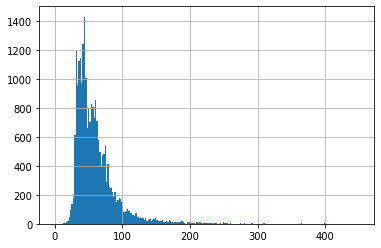

In [37]:
advert['total_area'].hist(bins=100, range=(0, 450))

Самые распространенные значения у нас примерно между 40 и 60, дальше ужет резкое уменьшение количества помещений с общей площадью более 60 квардартных метров.

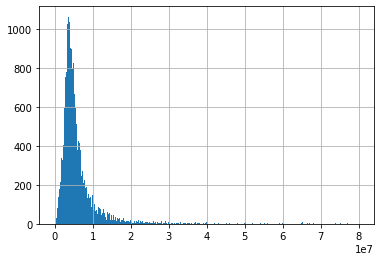

In [38]:
advert['last_price'].hist(bins=400, range=(0, 8e7))

Для цены справедливо, что большинство обявлений расположено за отметкой о цене в 10,000,000, однако же хвост тянется почти до 80,000,000. Будет инетресно посмотреть на ящик с усами по этому параметру.

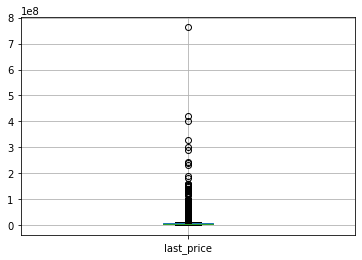

In [39]:
advert.boxplot('last_price')

На boxplot'е видно огромное колчиество выбросов. Один достигаем 770.000.000, другие располагаются ниже отметки 440.000.000. Эти значения далеки даже от Q3, поэтому сам по себе график не сильно наглядный. Изменим масштаб.

(0, 20000000.0)

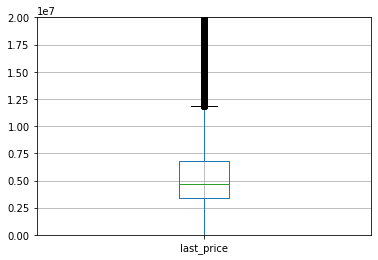

In [40]:
advert.boxplot('last_price')
plt.ylim(0, 2e7)

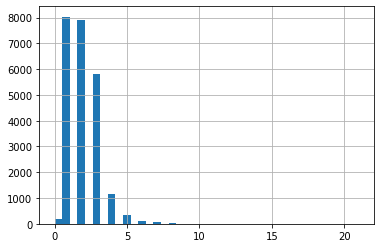

In [41]:
advert['rooms'].hist(bins=40, range=(0, 21))

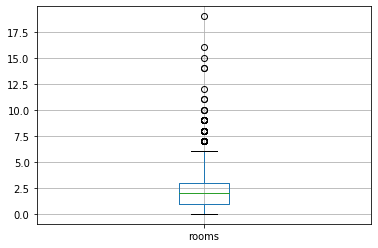

In [42]:
advert.boxplot('rooms')

С комнатами в квартирах все максимально очевидно, за исключением того, что на гистограмме не видны комнаты со значениями больше 9, так как их очень мало. А самый часто встречающийся вариант продажах - одно- и двухкомнатные квартиры. Трешек уже гораздо меньше, а студий (0 комнат) и от 5 комнат и выше минимальное колчиество.

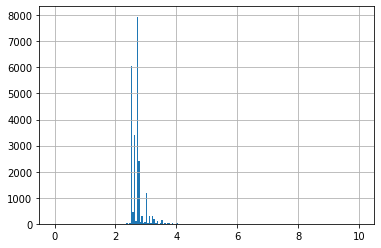

In [43]:
advert['ceiling_height'].hist(bins=200, range=(0, 10))

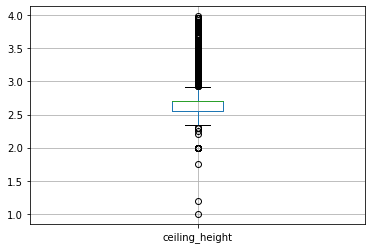

In [44]:
advert.query('ceiling_height < 4').boxplot('ceiling_height')

Высота потолков в квартирах из объявлений самая и самая разная. И хоть мы и исключили два самых больших выброса (выброс в 200 м сделали мы сами, чтобы потом можно было легко его найти и исключить при фильтрации), из-за огромного хвоста все равно график boxplot не говорит нам о значении медианы и двух квартилей.
Самые распротсраненные квартиры имеют высоту потолков примерно 2,6 - 2,8 м. Вариантов с потолками 4+ м можно по пальцам посчитать. Возможно здесь говорится о продаже частных домой или двухуровневых квартирах, которых не так много, отсюда и высокие потолки и так много комнат.

Каждая гиcтограмма представляет собой распределение Пуассона, где невозможны отрицательные значения. Оно берет начало на нуле и чем больше значение, тем реже оно встречается в наших данных.

### Шаг 5. Изучим время продажи квартиры. <a id=step5></a>
Построим гистограмму. Посчитаем среднее и медиану.

Ответим на вопросы:
1. Сколько обычно занимает продажа? 
2. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

days_exposition
1       1
2       3
3     159
4     174
5     154
6     125
7     234
8     139
9     142
10    127
11    137
12    108
13    128
14    148
15    126
16    100
17    116
18    129
19    122
20    139
21    125
22    125
23    112
24    117
25     83
26    104
27    110
28    125
29    122
30    208
Name: days_exposition, dtype: int64

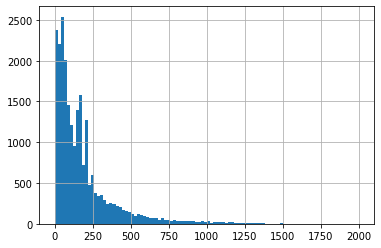

In [45]:
advert['days_exposition'].hist(bins=100, range=(0, 2000))
advert.groupby(by='days_exposition')[
    'days_exposition'].count().head(30)

Достаточно большое сосредоточение объявлений с количеством дней от 0 до 250 примерно, особенно странно, что их настолько много возле отметки 0.

Самое больше количество обявление провисело меньше 50 дней, что достаточно мало для продажи квартиры (лично мое мнение).

Начиная с объявлений, которые провиcели 250 дней и больше, хвост графика плавно уменьшается, а объявлений, которые провисели 1000 дней и более совсем небольшое количество (возможно, какие-то из них и правда долго продавались, но также есть вероятность, что просто забывали убрать его с сайта).

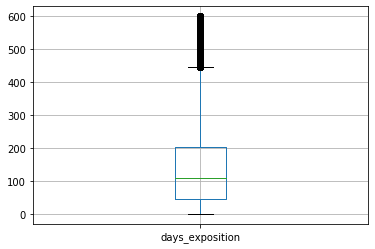

In [46]:
advert.query('days_exposition < 600').boxplot('days_exposition')

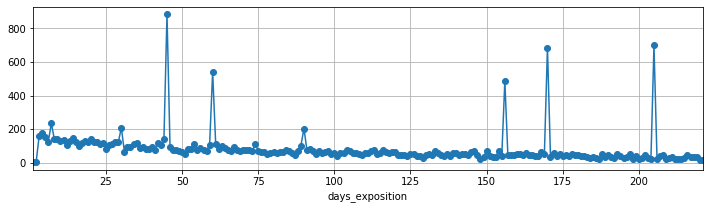

In [47]:
days_exposition_till_median = advert.query('days_exposition <= 221')
days_exp_hist = days_exposition_till_median.groupby(by='days_exposition')[
    'rooms'].count()
days_exp_hist.plot(style='o-', grid=True, figsize=(12, 3))

Видим сильные выбросы на тех или иных показателях. Так как они повторяются не с одной и той же частотой, то неверно предпогалать, что объявление автоматически деактивируется на сайте через определенные периоды времени. Эти обявления, которые закрывались массово в один и тот же день, скорее всего принадлежат риэлторам, которые сначала выставляли объявления и один день, а потом чистили базу в один день.

In [48]:
advert.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,kitchen_coeff,living_coeff
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,23650.000000,23636.000000,23650.000000,...,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23636.000000,21752.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,3.616592,10.682452,34.448356,5.893277,9.600198,0.591712,...,25728.927397,20423.473150,21281.349872,222.170359,9.943225e+04,2.568710,6.401564,2017.370021,0.170395,0.564750
std,5.682278,1.089640e+07,35.661808,1.078620,13.215397,6.590616,22.037664,4.883317,6.365515,0.959662,...,43295.205911,40314.188123,40439.586629,660.351629,5.033794e+04,1.788808,3.491418,1.037806,0.087721,0.105385
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-7.200000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,-0.297521,0.021583
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,6.300000,0.000000,...,498.597886,0.000000,520.213955,45.000000,7.661497e+04,1.000000,3.000000,2017.000000,0.121212,0.495157
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,498.597886,1.000000,520.213955,120.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.162331,0.567860
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.492500,1.000000,...,100000.000000,3.000000,888.000000,221.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.223881,0.637778
max,50.000000,7.630000e+08,900.000000,19.000000,200.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,100000.000000,100000.000000,100000.000000,10000.000000,1.907500e+06,6.000000,12.000000,2019.000000,0.787879,1.000000


Первым выбивающимся значением - объявления с публикацией длительностью 45 дней, что является и и первым квартилем.

In [49]:
mean_median_table_exposition = advert.agg({'days_exposition':('median', 'mean')})
mean_median_table_exposition
advert['days_exposition'].quantile([0.15, 0.2, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

0.15      30.00
0.20      41.00
0.75     221.00
0.80     266.00
0.85     336.00
0.90     437.00
0.95     627.00
0.99    1135.51
Name: days_exposition, dtype: float64

Среднее почти в два раза отличается от медианы: медиана - 3 месяца, среднее - более 7 месяцев.
15% квартир уходят за 30 дней и меньше, поэтому именно порог будет являться быстрым сроком продажи квартиры.
85% квартир уходит за 366 дней и меньше, поэтому все показатели выше 366 будем считать долгим.

По значениям выше видим, что резкий скачок по длительности произошел после 95% квартир, именно эти 5% продавались необъяснимо долго.

### Уберем редкие и выбивающиеся значения. 
В этой части работы посмотрим и обработаем редкие и выбивающиеся значения в следующих столбцах:
- Стоимость квартиры
- Количество комнат в квартире
- Площадь квартиры

Создадим таблицу, в которой будем отсекать редкие и выбивающиеся значения.

In [50]:
filt_data = advert[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 
                   'ceiling_height', 'floors_total', 'floor', 'locality_name', 'cityCenters_nearest',
                    'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',
                    'days_exposition', 'sq_meter_price', 'floor_type', 'weekday', 'month', 'year']]
filt_data.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,locality_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,floor_type,weekday,month,year
0,13000000.0,108.0,51.0,25.000000,3,2.70,16,8,Санкт-Петербург,16028.0,1,482.0,2,755.000000,205,120370.370370,другой,3,3,2019
1,3350000.0,40.4,18.6,11.000000,1,2.63,11,1,поселок Шушары,18603.0,0,100000.0,0,573.217105,81,82920.792079,первый,1,12,2018
2,5196000.0,56.0,34.3,8.300000,2,2.70,5,4,Санкт-Петербург,13933.0,1,90.0,2,574.000000,558,92785.714286,другой,3,8,2015
3,64900000.0,159.0,NaN,0.422771,3,2.70,14,9,Санкт-Петербург,6800.0,2,84.0,3,234.000000,424,408176.100629,другой,4,7,2015
4,10000000.0,100.0,32.0,41.000000,2,3.03,14,13,Санкт-Петербург,8098.0,2,112.0,1,48.000000,121,100000.000000,другой,1,6,2018


Посмотрим с помощью графика boxplot, какие значения выбиваются из общего строя в столбце со стоимостью и уберем их методом query().

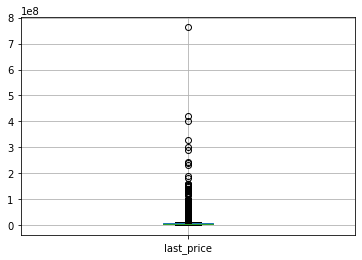

In [51]:
filt_data.boxplot('last_price')

(23455, 20)

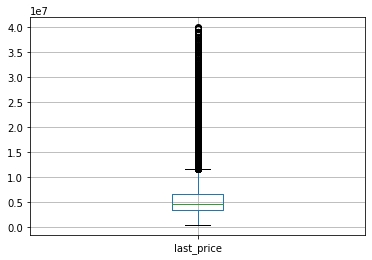

In [52]:
filt_data = filt_data.query('1e5 <last_price < 4e7')
filt_data.boxplot('last_price')
filt_data.shape

In [53]:
filt_data.sort_values('last_price').head(15)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,locality_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,floor_type,weekday,month,year
14911,430000.0,54.0,NaN,0.348277,2,200.000,3,3,поселок станции Свирь,100000.0,100000,100000.0,100000,100000.0,44,7962.962963,последний,1,6,2018
17456,430000.0,30.4,16.0,6.000000,1,2.500,2,1,Сланцы,100000.0,100000,100000.0,100000,100000.0,176,14144.736842,первый,0,4,2019
16274,440000.0,40.0,NaN,0.249899,1,200.000,5,1,деревня Старополье,100000.0,100000,100000.0,100000,100000.0,45,11000.000000,первый,1,7,2018
17676,450000.0,36.5,17.3,8.500000,1,200.000,5,4,деревня Ям-Тесово,100000.0,100000,100000.0,100000,100000.0,120,12328.767123,другой,3,2,2018
16219,450000.0,38.5,NaN,0.348277,2,2.650,2,1,деревня Вахнова Кара,100000.0,100000,100000.0,100000,100000.0,45,11688.311688,первый,2,7,2018
9581,450000.0,43.4,30.3,5.500000,2,200.000,5,3,деревня Старополье,100000.0,100000,100000.0,100000,100000.0,96,10368.663594,другой,4,8,2018
5698,450000.0,42.0,23.0,5.800000,2,2.615,1,1,городской поселок Будогощь,100000.0,100000,100000.0,100000,100000.0,233,10714.285714,первый,0,7,2017
23484,470000.0,44.5,28.0,7.500000,2,2.500,2,2,Сланцы,100000.0,100000,100000.0,100000,100000.0,298,10561.797753,последний,0,7,2018
18867,470000.0,41.0,32.0,9.000000,1,200.000,5,3,деревня Выскатка,100000.0,100000,100000.0,100000,100000.0,46,11463.414634,другой,6,2,2018
21912,470000.0,37.0,NaN,0.249899,1,2.600,3,3,поселок Совхозный,100000.0,100000,100000.0,100000,100000.0,45,12702.702703,последний,6,2,2018


In [54]:
filt_data['rooms'].value_counts()

1     8034
2     7912
3     5742
4     1130
5      286
0      196
6       89
7       43
8        9
9        6
14       2
11       2
10       2
19       1
16       1
Name: rooms, dtype: int64

Таким образом мы оставили только те квартиры, которые стоят не ниже 100 000 и не выше 40 млн, так как такая стоимость уже не является редкостью и не так сильно выбивается по сравнению с ценами вроде 12 000 или 200 млн. за квартиру.

(23432, 20)

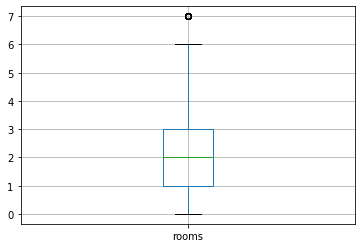

In [55]:
# Теперь уберем выбивающиеся значения в столбце количество комнат
# оставим только те, где 7 комнат и меньше.

filt_data = filt_data.query('rooms <= 7')
filt_data.boxplot('rooms')
filt_data.shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48bc9df590>]],
      dtype=object)

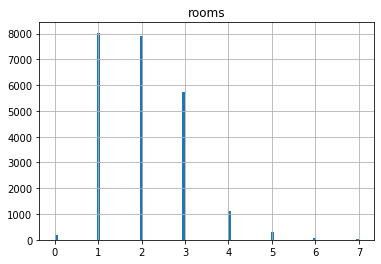

In [56]:
filt_data.hist('rooms', bins=100)

In [57]:
# Теперь посмотрим на площадь квартир.

filt_data.sort_values('total_area').head(10)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,locality_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,floor_type,weekday,month,year
19904,2400000.0,12.0,10.0,0.249899,1,2.55,5,2,Санкт-Петербург,964.0,1,886.000000,2,45.000000,200,200000.000000,другой,2,7,2017
19807,3800000.0,13.0,10.0,0.249899,1,2.70,5,3,Санкт-Петербург,1242.0,1,592.000000,3,27.000000,9,292307.692308,другой,2,7,2018
19546,1850000.0,13.0,NaN,0.249899,1,3.40,5,2,Санкт-Петербург,5483.0,1,644.000000,0,520.213955,24,142307.692308,другой,0,3,2019
17961,1400000.0,13.0,NaN,0.249899,1,2.60,9,1,Санкт-Петербург,15945.0,0,498.597886,1,185.000000,410,107692.307692,первый,6,12,2017
19558,1686000.0,13.2,NaN,0.249899,1,2.70,5,1,Санкт-Петербург,4165.0,1,361.000000,1,155.000000,19,127727.272727,первый,0,12,2018
19642,1190000.0,14.0,11.0,2.000000,1,2.70,5,1,Санкт-Петербург,11122.0,0,498.597886,0,520.213955,4,85000.000000,первый,6,7,2018
12040,1900000.0,15.0,NaN,0.249899,1,2.50,5,1,Сосновый Бор,100000.0,100000,100000.000000,100000,100000.000000,45,126666.666667,первый,2,6,2018
16949,1550000.0,15.0,NaN,0.249899,1,2.70,9,1,Санкт-Петербург,16376.0,0,498.597886,1,1079.000000,42,103333.333333,первый,1,8,2018
8886,2450000.0,15.5,10.0,-1.700000,0,2.70,5,2,Санкт-Петербург,4589.0,0,498.597886,1,446.000000,27,158064.516129,другой,2,8,2018
9412,2100000.0,16.0,13.0,-4.200000,0,2.70,6,1,Санкт-Петербург,2111.0,2,228.000000,3,72.000000,3,131250.000000,первый,6,12,2017


Интересно в некоторых случаях, что жилая площадь несильно отличается от общей площади. Предположим, что это могут быть отдельные комнаты в коммунальных квартирах.

(23432, 20)

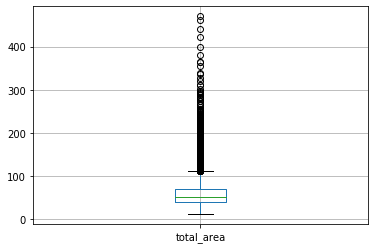

In [58]:
filt_data.boxplot('total_area')
filt_data.shape

In [59]:
filt_data.describe()
filt_data['total_area'].quantile([0.25, 0.5, 0.75, 0.9, 0.99, 1])

0.25     40.000
0.50     51.800
0.75     68.900
0.90     91.000
0.99    169.407
1.00    470.300
Name: total_area, dtype: float64

(22916, 20)

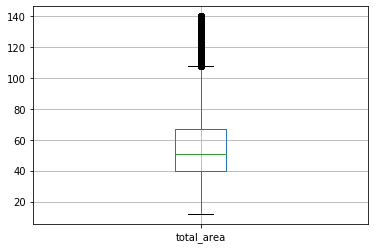

In [60]:
# В данном случае отсечем 1%, то есть все квартиры с площадью, больше 140 м.

filt_data = filt_data.query('total_area < 140')
filt_data.boxplot('total_area')
filt_data.shape

### Какие факторы больше всего влияют на стоимость квартиры? <a id=step6></a>
Зависимость цены от квадратного метра, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также посмотрим зависимость от даты размещения: дня недели, месяца и года.

0.7318235645304929

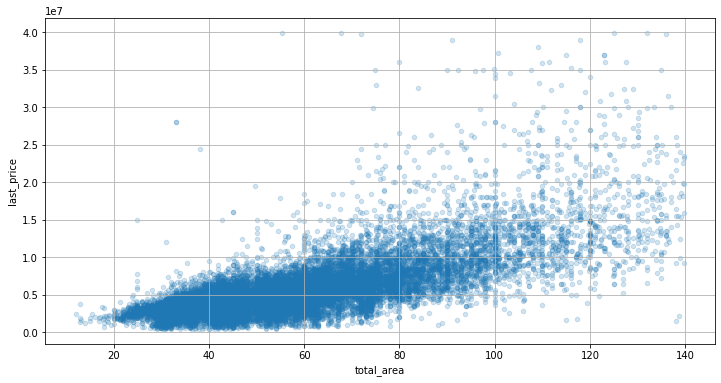

In [62]:
filt_data.plot(x='total_area', y='last_price', style='o', 
            grid=True, kind='scatter', alpha=0.2, figsize=(12, 6))

# Очевидна положительная корреляция, но интересно узнать, насколько она сильная
# для этого посчитаем коэффицент корреляции Пирсона

filt_data['total_area'].corr(filt_data['last_price'])

Значение коэффицента 0.75 - достаточно высокое, чтобы указывать на наличие зависимости между этими двумя показателями.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


0.4299030914374781

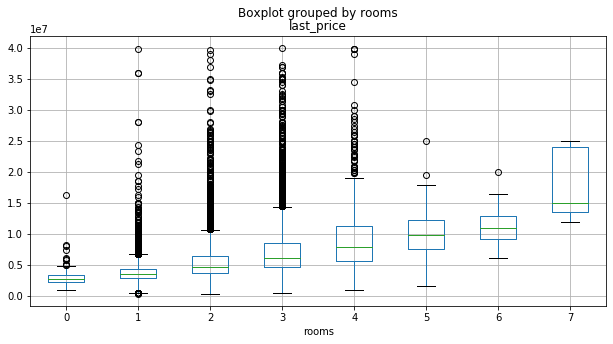

In [63]:
filt_data.boxplot('last_price', by='rooms', figsize=(10, 5))

# Аналогично найдем коэффицент корреляции и для этой пары.

filt_data['rooms'].corr(filt_data['last_price'])

Вполне ожидаемо, что с увеличением количества комнат в квартире, цена также увеличивается. Однако стоит отметить, что тут скорее будет влиять площадь занимаемая квартирой, нежели количество комнат, так как квартира с 1 большой комнатой и просторной кухней может оказаться побольше некоторых 3-комнатных квартир.

Интересно, что минимальная стоимость квартир с 0 комнат чуть выше по сравнению с 1-, 2- и даже 3-комнатными квартирами, их стоимость начинается примерно как для 4-комнатной квартиры. Возможно, это квартиры с супер большой площадью в центре Петербурга, а возможно были слишком плохие варианты 1, 2 и 3-комнатных квартир.

-0.4225492794377447

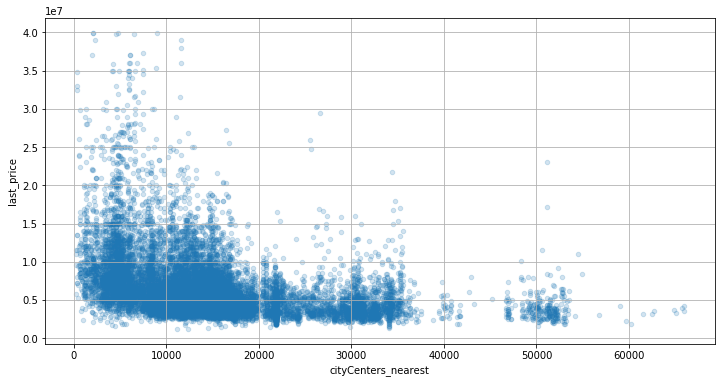

In [64]:
# Перейдем к проверке зависимости цены от удаленности от центра
# здесь же найдем коэффицент корреляции.

filt_data.query('cityCenters_nearest < 100000').plot(x='cityCenters_nearest', y='last_price', style='o', 
            grid=True, kind='scatter', alpha=0.2, figsize=(12, 6))

filt_data['cityCenters_nearest'].corr(filt_data['last_price'])

В данном случае наблюдаем слабую отрицательную корреляцию. на графике видно, что чем дальше от центра тем меньше стоимость квартиры. Но здесь также может сыграть роль сама квартира - сколько комнат, наличие ремонта, первичное или вторичное жилье, транспортная доступность. Поэтому стопроцентно утверждать, что стоимость зависит от удаленности от центра, мы не будем. 

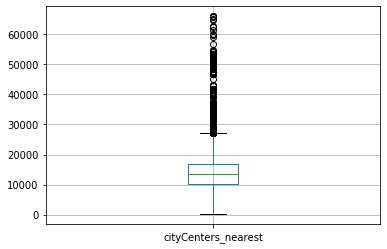

In [65]:
filt_data.query('cityCenters_nearest < 100000').boxplot('cityCenters_nearest')

#### Зависимость стоимости квартиры от этажа

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


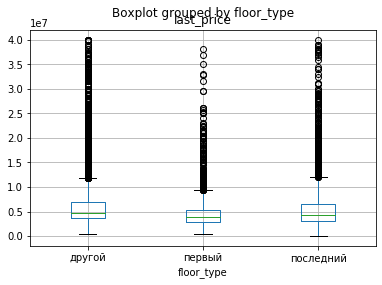

In [66]:
filt_data2 = advert[['last_price', 'floor_type']]
filt_data2.query('last_price < 4e7').boxplot('last_price', by='floor_type', )

Самые доргие квартиры находятся на последнем этаже, но таких дорогих квартир очень мало, поэтому можно предположить, что они доорогие не только из-за этажа, но и по каким-либо другим причинам.

В целом же видно, что квартиры на первом этаже все же немного, но дешевле, чем остальные.

#### Зависимость от даты размещения: дня недели, месяца и года.

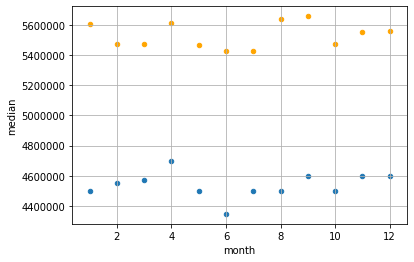

In [67]:
# Выведем средние и медианные значения стоимости квартир, 
# распределенные по месяцам размеения объявлений.

ax = filt_data.pivot_table(index='month', values='last_price', aggfunc=(
    'count', 'mean', 'median')).reset_index().sort_values('mean').plot(
    x='month', y='mean', kind='scatter', style='-', color='orange')

filt_data.pivot_table(index='month', values='last_price', aggfunc=(
    'count', 'mean', 'median')).reset_index().sort_values('mean').plot(
    x='month', y='median', kind='scatter', style='o', ax=ax, grid=True)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

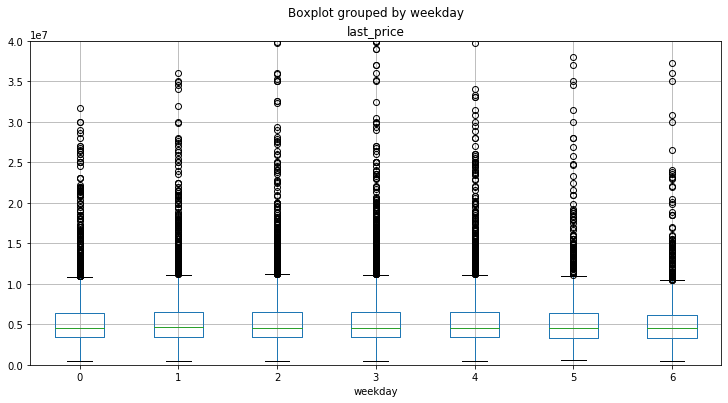

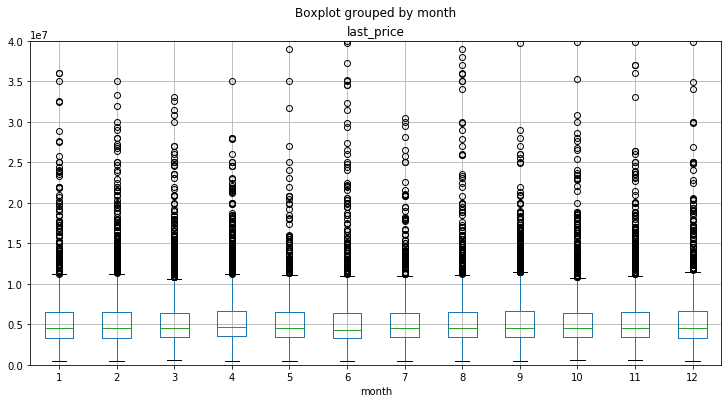

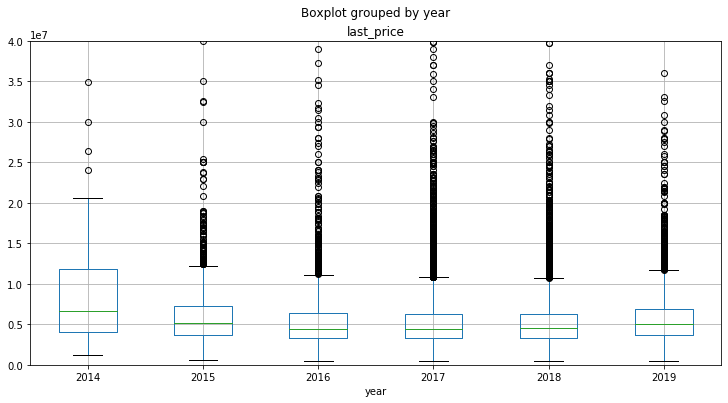

In [68]:
for column in ['weekday', 'month', 'year']:
    filt_data.query('last_price < 4e7').boxplot(
    'last_price', by=column, figsize=(12, 6))
    plt.ylim(-500, 4e7)

Итак посмотрим на графики зависимости.
##### День недели
Сильно сомневаюсь, что есть какая-либо зависимость цены от даты размещения, но посмотрим данные. В выходные выкладывали гораздо меньше дорогих вариантов, а в  понедельник и честверг выкладивались квартиры всех ценовых категорий. В целом же сильной разницы в остальных днях не заметно.

##### Месяц
Если мы говорим о стоимости квартир, то в октябре и в мае было меньше дорогих вариантов по сравнению с остальными месяцами. В целом во все месяцы квартиры распределены по стоимости более или менее одинаково, поэтому говорить о сильной зависимости от месяца размещения кажется неправдоподобным. Но если же посмотреть на средние и медианные значения на графиках выше, то увидим большое различие в медианных и средних значениях стоимости по месяцам. Но видно, что дешевле варианты были в июне, а дороже в апреле. Высокие показатели среднего по декабрю и сентябрю скорее всего появилимь из-за больших выбросов, поэтому берем апрель.

##### Год
Здесь мы видим, что медиана цен квартир в 2014 году была заметно выше, чем в другие года, очень интересное наблюдение, с учетом того, что курс доллара был значительно ниже, чем после 2014. Дальше медина цен на квартиры начали снижаться, а 2019 год вышел на отметку меданы, как в 2015 году. В 2017 чуть больше дорогих квартир, чем в остальные года.

### 10 населённых пунктов с наибольшим числом объявлений. <a id=step7></a>
Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [70]:
# Создаем датафрейм, где мы остальвяет только те строки, 
# где указан один из 10 населенных пунктов с наиболшим числом объявлений.

locality_name_top_10 = filt_data['locality_name'].value_counts().head(10).index
data_top_10 = filt_data.query('locality_name in @locality_name_top_10')
data_top_10.shape

(18487, 20)

In [71]:
data_top_10.pivot_table(index='locality_name', values='sq_meter_price', 
                        aggfunc='mean').sort_values('sq_meter_price')

,sq_meter_price
locality_name,
Выборг,58180.714024
Всеволожск,68703.119751
Гатчина,68727.953785
Колпино,75333.295801
поселок Шушары,78677.364217
Мурино,86087.512050
поселок Парголово,90332.263023
Кудрово,95324.930544
Пушкин,102943.877451


Самая высокая стоимость квадратного метра в Санкт-Петербурге, а дешевле всего квадратный метр стоит в Выборге.

### Расстояние до центра. <a id=step8></a>
Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. Далее посчитаем среднюю цену для каждого километра. Построим график - как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [72]:
# Cтолбец с расстоянием до центра в километрах.
# округлили до целых значений.

filt_data['cityCenters_nearest_km'] = (filt_data['cityCenters_nearest'] / 1000).astype('int')
data_spb = filt_data.query('locality_name == "Санкт-Петербург"')

data_spb.sort_values('cityCenters_nearest_km').head(10)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,locality_name,cityCenters_nearest,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,floor_type,weekday,month,year,cityCenters_nearest_km
21574,12300000.0,120.00,78.00,14.000000,4,3.10,4,4,Санкт-Петербург,772.0,...,605.0,2,110.0,257,102500.000000,последний,4,9,2018,0
3314,16550000.0,96.00,80.00,10.000000,6,2.60,5,3,Санкт-Петербург,700.0,...,546.0,3,183.0,108,172395.833333,другой,4,2,2018,0
20207,22400000.0,113.00,75.00,26.100000,3,3.06,4,1,Санкт-Петербург,649.0,...,1079.0,2,44.0,86,198230.088496,первый,2,8,2018,0
3800,6900000.0,47.60,28.20,8.200000,2,2.70,5,5,Санкт-Петербург,472.0,...,319.0,3,142.0,398,144957.983193,последний,2,7,2015,0
2478,4000000.0,39.00,25.90,5.400000,2,3.10,5,1,Санкт-Петербург,853.0,...,888.0,2,134.0,4,102564.102564,первый,3,2,2018,0
7467,14000000.0,105.10,61.00,14.000000,3,2.70,5,3,Санкт-Петербург,996.0,...,191.0,3,213.0,117,133206.470029,другой,3,6,2017,0
19694,24000000.0,132.50,NaN,0.496026,4,3.20,4,3,Санкт-Петербург,602.0,...,539.0,3,38.0,785,181132.075472,другой,2,10,2016,0
22531,8000000.0,72.70,40.50,12.000000,3,3.05,4,4,Санкт-Петербург,772.0,...,605.0,2,110.0,199,110041.265475,последний,4,2,2018,0
5014,15000000.0,70.00,48.00,9.000000,2,2.70,4,4,Санкт-Петербург,686.0,...,945.0,2,38.0,167,214285.714286,последний,2,1,2018,0
5195,9500000.0,60.28,39.18,8.000000,2,3.47,4,3,Санкт-Петербург,730.0,...,973.0,2,184.0,216,157597.876576,другой,2,9,2018,0


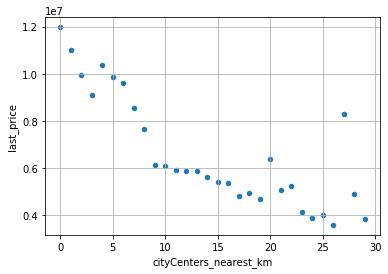

In [73]:
# Строим график для определения границы центральной части.

data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', 
                     aggfunc='mean').reset_index().plot(kind='scatter', 
                            y='last_price', x='cityCenters_nearest_km', style='o-', grid=True)

Судя по графику, резкий скачок в цене произошел между 9 и 10 колиметрами от центра, соответственно первые 9 км и буду являться центральной зоной.

### Выделение сегмента квартир в центре. <a id=step9></a>
Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?

In [75]:
# Создадим отдельный столбец булевого типа, который говорит нам,
# находится ли квартира в центральной части говора или нет.

def center_classification(row):
    if row['cityCenters_nearest_km'] < 9:
        return 'да'
    return 'нет'

data_spb['is_center'] = data_spb.apply(center_classification, axis=1)

data_spb.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,locality_name,cityCenters_nearest,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,floor_type,weekday,month,year,cityCenters_nearest_km,is_center
0,13000000.0,108.0,51.0,25.0,3,2.70,16,8,Санкт-Петербург,16028.0,...,2,755.000000,205,120370.370370,другой,3,3,2019,16,нет
2,5196000.0,56.0,34.3,8.3,2,2.70,5,4,Санкт-Петербург,13933.0,...,2,574.000000,558,92785.714286,другой,3,8,2015,13,нет
4,10000000.0,100.0,32.0,41.0,2,3.03,14,13,Санкт-Петербург,8098.0,...,1,48.000000,121,100000.000000,другой,1,6,2018,8,да
7,7915000.0,71.6,NaN,18.9,2,2.70,24,22,Санкт-Петербург,11634.0,...,0,520.213955,170,110544.692737,другой,3,4,2019,11,нет
9,5400000.0,61.0,43.6,6.5,3,2.50,9,7,Санкт-Петербург,15008.0,...,0,520.213955,289,88524.590164,другой,6,2,2017,15,нет


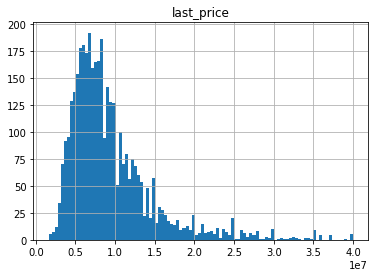

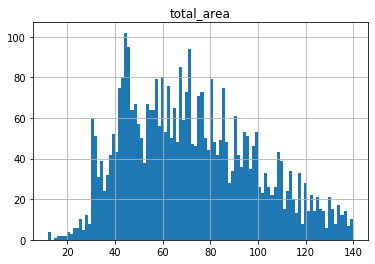

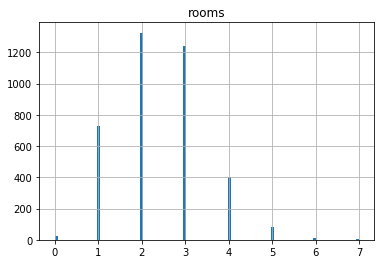

In [76]:
# Строим гистограммы для параметров: 
# площадь, цена, число комнат, высота потолков.

for column in ['last_price', 'total_area', 'rooms']:
    data_spb.query('is_center == "да"').hist(column, bins=100)
    

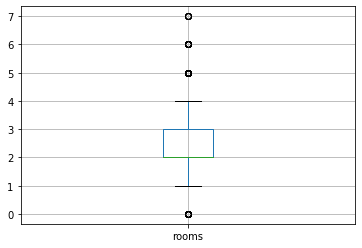

In [77]:
data_spb.query('is_center == "да"').boxplot('rooms')

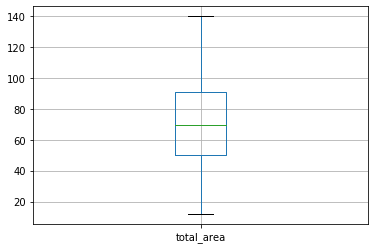

In [78]:
data_spb.query('is_center == "да"').boxplot('total_area')

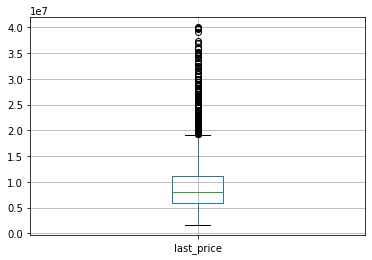

In [79]:
data_spb.query('is_center == "да"').boxplot('last_price')

- Цена. В сравнении с стоимость по всем населенным пунктам видно, что в центре Питера большая часть квартир лежит в ценовом диапазоне от 4 до 10 млн. Если же рассматривать все населеднные пункты, то основная масса располагалась в диапазоне между 2.5 и 5.5 млн.
- Площадь. Если при рассмотрении по всем нас. пунктам показатель 140 был крайним выбросом, который мы оставили, то для центра Питера это значение Q3.
- Кол-во комнат. В центре питера преобладают объявления с 2-комнатными квартирами, далее идут 3-комнатные и только потом уже однушки. По всем нас. пунктам же картина иная - больше всего однушек, дальше двушки и на третьем месте 3-комнатные.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48ba9c1210>]],
      dtype=object)

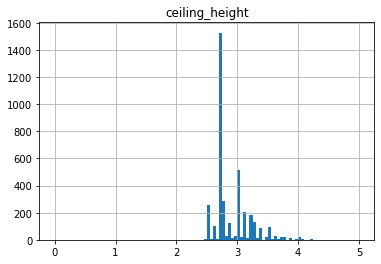

In [80]:
# Высота потолков отдельно, потому что для него нужен был доп/ параметр range.

data_spb.query('is_center == "да"').hist(
    'ceiling_height', bins=100, range=(0, 5))

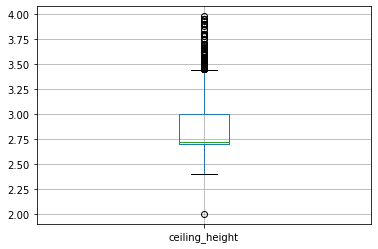

In [81]:
data_spb.query('is_center == "да" and ceiling_height < 4').boxplot('ceiling_height')

Медиана высоты потолков изменилась, но не столь заметно. Однако распределение квартилей заметно изменилось, теперь Q3 = 3м, в графике по всем нас. пунктам он был примерно 2.4.

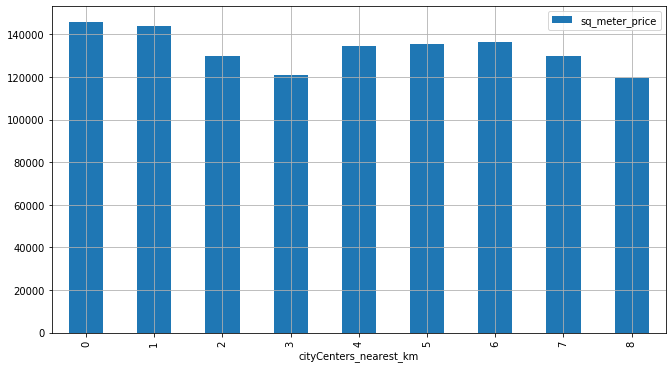

In [82]:
# Посмотрим стоимость квадратного метра в зависимости от километра от центральной зоны.

(data_spb.query('is_center == "да"')
     .pivot_table(index = 'cityCenters_nearest_km',
                values = 'sq_meter_price',
                aggfunc = 'mean')
     .plot(kind = 'bar', figsize = (11,6), grid=True))

Построим столбчатые диаграммы по следующим параметрам: (число комнат, этаж, удалённость от центра, дата размещения объявления. На одном графике будут параметры для центральной зоны Петербурга и для всего города.

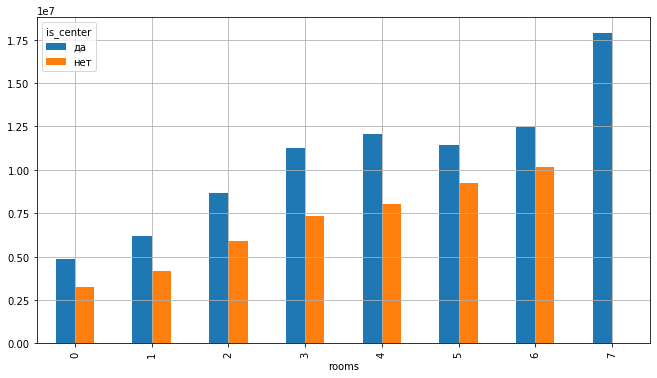

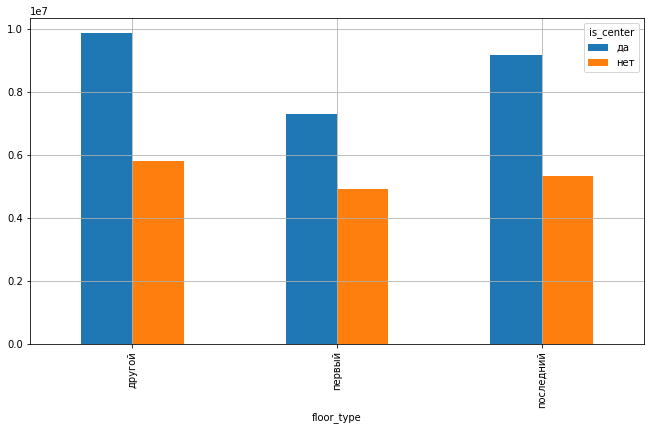

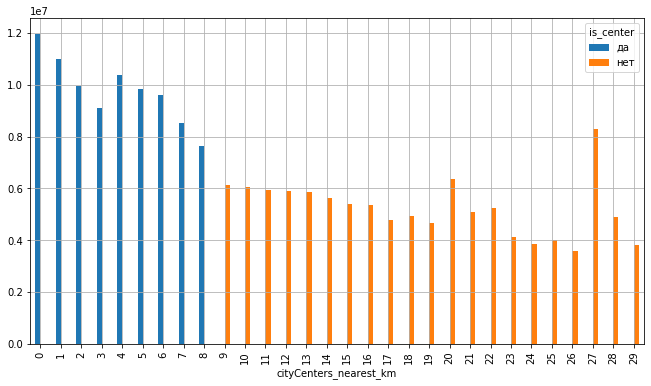

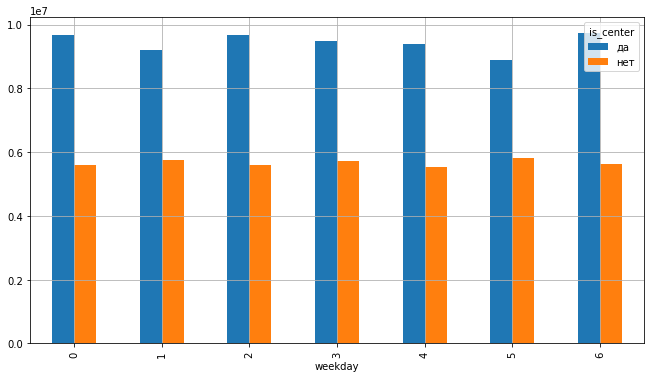

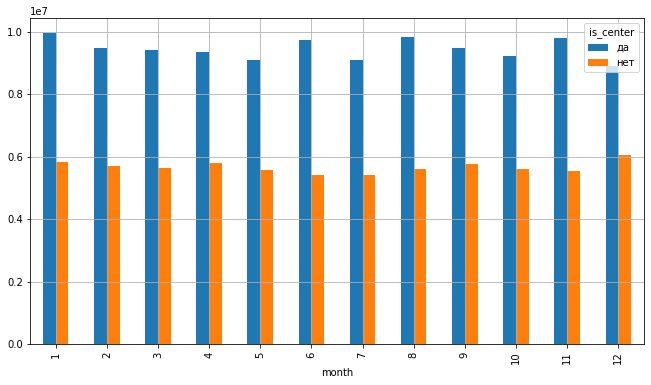

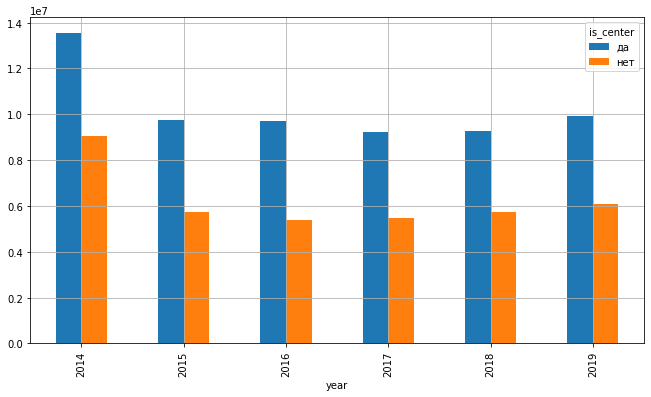

In [84]:
for column in ['rooms', 'floor_type', 'cityCenters_nearest_km', 'weekday', 'month', 'year']:
    (data_spb.query('last_price < 4e7')
     .pivot_table(index = column,
                columns = 'is_center',
                values = 'last_price',
                aggfunc = 'mean')
     .plot(kind = 'bar', figsize = (11,6), grid=True))

##### Количество комнат
Очевидно, что квартиры в центре на порядок дороже (сравниваем по средним), и это справедливо абсолютно для всех выведенных выше графиков. Видим, что только в центральной зоне есть семикомнатная квартира. Соответственно, чем больше комнат, тем выше стоимость квартиры, это относится и к центру, и ко всему Петербургу.
##### Этаж
В центре разница в стоимости между квартирами на разных этажах гораздо больше, чем центре. Если для всего Питера верно, что разница между первым и другим примерно 800 000, в центре Питера между этими же этажами разница примерно 1,5 млн.
##### Удаленность от центра
На 20 и 27 км от центра Санкт_Петербурга, видимо, есть дорогие квартиры, которые создали очевидные выбивающиеся значения. В целом же ценовая политика в центре очень схожа с политикой по всему городу.
##### День размещения объявления
В понедельник, среду и воскресенье выкладывались чуть более дорогие варианты квартир по центру Петербурга, по сравнению с остальными днями. В эти же дни по всему городу были наоборот более низкие цены. Зато во вторник и субботу варианты центру были низкими, а во всем Питере это были самые самые дорогие из всех дней. Но не будем сильно радоваться, разница не настолько уж велика, чтобы возгалать на нее большие надежды.
##### Месяц размещения объявления
Очень интересный декабрь. По сравнению во всеми остальными месяцами выставлялись сравнительно недорогие квартиры в центре, но при этом в декабре же средняя цена квартир по всему городу была выше, чем в остальные месяца. Остальные месяцы, к сожалению, не настолько примечательны.
##### Год размещения объявления
Ничего нового в зависимости от года размещения не выявилось, стоимость квартир в 2014 также самая высокая, по сравнению с остальными годами, 2019 все также чуть дороже, чем 2015-2018, но сильно дешевле 2014 года.

In [1]:
dict_for_hist = {'floor' : [20, (1,20)],
                 'last_price' : [50, (0, 15000000)]}
dict_for_hist

{'floor': [20, (1, 20)], 'last_price': [50, (0, 15000000)]}

### Шаг 6. Общий вывод. <a id=step10></a>

Итак, мы проверили зависимости цены от большого количества параметров и пришли к следующим выводам.


- На стоимость квартиры точно не влияет день и месяц размещения, однако видна была сильная разница в стоимости в зависимости от года размещения - средняя стоимость выше всех была в 2014 году, самая низкая - в 2017.
- Сильное влияние оказывает площадь самой квартиры: чем больше площадь, тем выше стоимость.
- Но при этом не всегда количество комнат сказывается на стоимости, так как это скорее будет зависеть от площади целиком. На графиках мы видели, что квартиры с 0 комнат имет начальную цену как 4-комнатные квартиры.
- Также важным параметром стала удаленность от центра. Было ясно видно, что стоимость сильно колеблется от того, где находится квартира.
- Мы также разпределили этажи на "первый", "последний" и "другой". Судя по графикам, первый этаж пользуется не таким уж большим спросом, поэтому и цены на него чуть ниже, чем цены на квартиры в "последнем" или "другом" этажах.
- Стоимость квадратного метра тоже является значимым параметром, но сам он в то же время зависит от свего географического положения. Однако в пределах центральных 9 км мы видим, что стоимость м2 идет не по убыванию километров. В этом случае можем предположить, что сами квартиры на более далеких центральных километрах обустроены гораздо лучше, нежели более близкие.